In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt

In [2]:
import celltypist
from celltypist import models

In [3]:
## set working directory
os.chdir("/data1/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/T_NK/others_V2/combine/")

In [4]:
## read data
adata = sc.read_h5ad("./other.bySample.n10.bbknn_umap_leiden_marker.res0.3.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)

In [5]:
## add meta data
meta_data = pd.read_csv("/home/niehu/niehu/ibd_public_data_20210821/analysis_20220111/01.preprocess/cell_meta/ibd_meta_data_cells.csv", header=0)
meta_data.index = meta_data.cellName

select = meta_data[meta_data.index.isin(adata.obs.index.to_list())]
select = select.loc[adata.obs.index,:]

adata.obs["location2"] = pd.Categorical(select.location2)
adata.obs["location1"] = pd.Categorical(select.location1)
adata.obs["developmentStage"] = pd.Categorical(select.developmentStage)
adata.obs["disease"] = pd.Categorical(select.disease)

/home/niehu/niehu/soft/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3012: DtypeWarning: Columns (3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


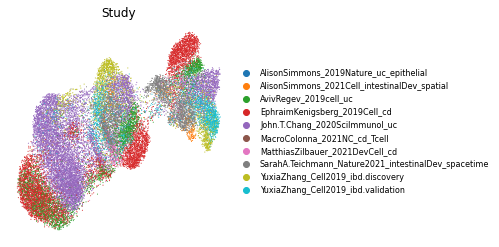

In [6]:
with rc_context({'figure.figsize': (4, 4)}):
    #sc.pl.umap(adata, color=['study'], legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)
    sc.pl.umap(adata, color=['study'], title='Study', frameon=False, legend_fontsize = 8)

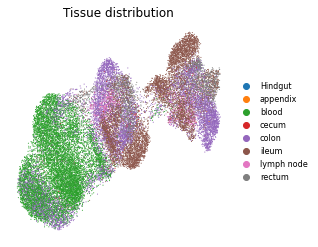

In [7]:
with rc_context({'figure.figsize': (4, 4)}):
    #sc.pl.umap(adata, color=['location2'], legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)
    sc.pl.umap(adata, color=['location2'], title='Tissue distribution', frameon=False, legend_fontsize = 8)

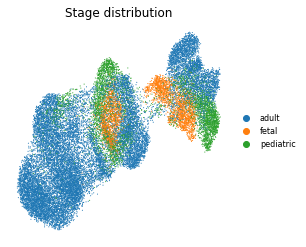

In [8]:
with rc_context({'figure.figsize': (4, 4)}):
    #sc.pl.umap(adata, color=['developmentStage'], legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)
    sc.pl.umap(adata, color=['developmentStage'], title='Stage distribution', frameon=False, legend_fontsize = 8)

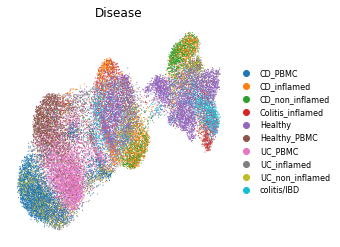

In [9]:
with rc_context({'figure.figsize': (4, 4)}):
    #sc.pl.umap(adata, color=['disease'], legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)
    sc.pl.umap(adata, color=['disease'], title='Disease', frameon=False, legend_fontsize = 8)

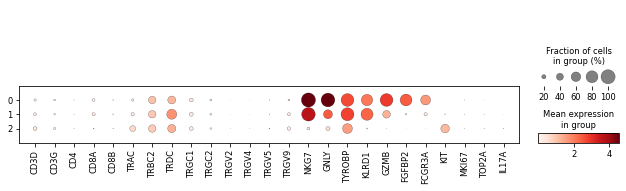

In [10]:
sc.pl.dotplot(adata, ["CD3D","CD3G","CD4","CD8A","CD8B",
                      "TRAC","TRBC2","TRDC","TRGC1","TRGC2","TRGV2","TRGV4","TRGV5","TRGV9",
                      "NKG7","GNLY","TYROBP","KLRD1", ## NK
                      "GZMB","FGFBP2","FCGR3A", ## NKT
                      "KIT",## ILC
                      "MKI67","TOP2A",
                      "IL17A"
                     ], groupby='leiden')

In [11]:
predictions = celltypist.annotate(adata, model = 'Immune_All_Low.pkl', majority_voting = True, over_clustering = 'leiden')

👀 Detected scaled expression in the input data, will try the `.raw` attribute
🔬 Input data has 27195 cells and 15813 genes
🔗 Matching reference genes in the model
🧬 1934 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🗳️ Majority voting the predictions
✅ Majority voting done!


In [12]:
models.models_description()

👉 Detailed model information can be found at `https://www.celltypist.org/models`


,model,description
0,Immune_All_Low.pkl,immune sub-populations combined from 20 tissue...
1,Immune_All_High.pkl,immune populations combined from 20 tissues of...
2,Immune_All_PIP.pkl,immune cell types combined from 16 adult human...
3,Immune_All_AddPIP.pkl,immune cell types combined from >20 human tiss...
4,Cells_Intestinal_Tract.pkl,"intestinal cells from fetal, pediatric and adu..."
5,Cells_Lung_Airway.pkl,cell populations from scRNA-seq of five locati...
6,Developing_Mouse_Brain.pkl,cell types from the embryonic mouse brain betw...
7,Nuclei_Lung_Airway.pkl,cell populations from snRNA-seq of five locati...
8,Pan_Fetal_Human.pkl,stromal and immune populations from the human ...


In [13]:
adata = predictions.to_adata()

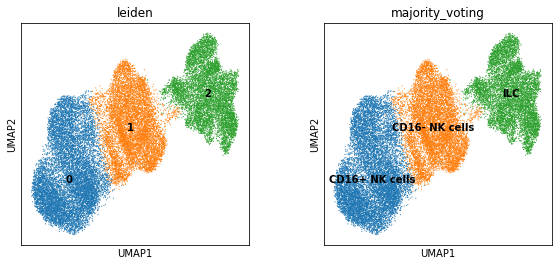

In [14]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color = ['leiden', 'majority_voting'], legend_loc = 'on data')

In [15]:
## read data
adata = sc.read_h5ad("./other.bySample.n10.bbknn_umap_leiden_marker.res0.6.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)

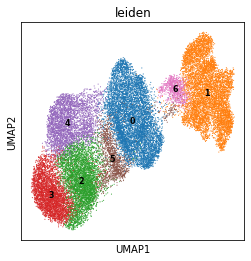

In [16]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)

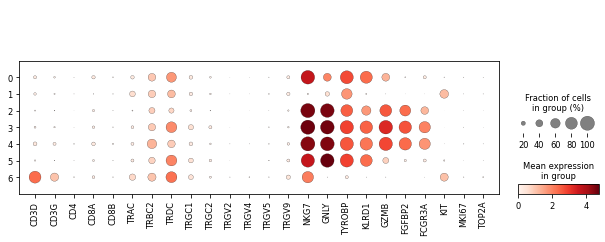

In [17]:
sc.pl.dotplot(adata, ["CD3D","CD3G","CD4","CD8A","CD8B",
                      "TRAC","TRBC2","TRDC","TRGC1","TRGC2","TRGV2","TRGV4","TRGV5","TRGV9",
                      "NKG7","GNLY","TYROBP","KLRD1", ## NK
                      "GZMB","FGFBP2","FCGR3A", ## NKT
                      "KIT",## ILC
                      "MKI67","TOP2A",
                     ], groupby='leiden')

In [18]:
## read data
adata = sc.read_h5ad("./other.bySample.n10.bbknn_umap_leiden_marker.res0.9.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)

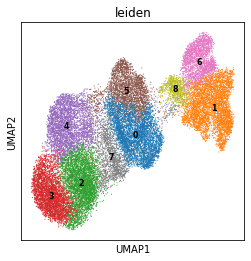

In [19]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)

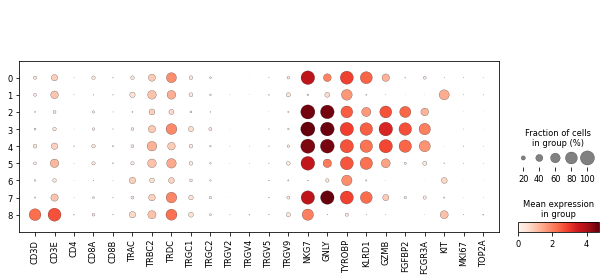

In [20]:
sc.pl.dotplot(adata, ["CD3D","CD3E","CD4","CD8A","CD8B",
                      "TRAC","TRBC2","TRDC","TRGC1","TRGC2","TRGV2","TRGV4","TRGV5","TRGV9",
                      "NKG7","GNLY","TYROBP","KLRD1", ## NK
                      "GZMB","FGFBP2","FCGR3A", ## NKT
                      "KIT",## ILC
                      "MKI67","TOP2A",
                     ], groupby='leiden')

In [21]:
## read data
adata = sc.read_h5ad("./other.bySample.n10.bbknn_umap_leiden_marker.res1.2.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)

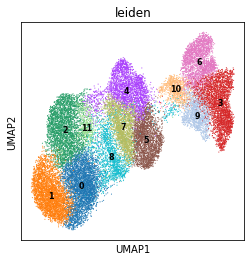

In [22]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)

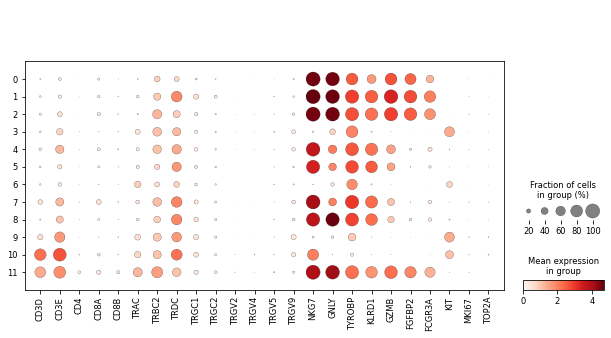

In [23]:
sc.pl.dotplot(adata, ["CD3D","CD3E","CD4","CD8A","CD8B",
                      "TRAC","TRBC2","TRDC","TRGC1","TRGC2","TRGV2","TRGV4","TRGV5","TRGV9",
                      "NKG7","GNLY","TYROBP","KLRD1", ## NK
                      "GZMB","FGFBP2","FCGR3A", ## NKT
                      "KIT",## ILC
                      "MKI67","TOP2A",
                     ], groupby='leiden')

In [4]:
## read data
adata = sc.read_h5ad("./other.bySample.n10.bbknn_umap_leiden_marker.res1.5.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)

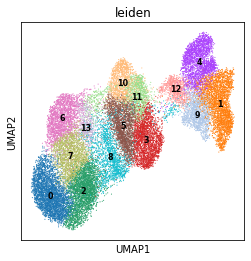

In [5]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)

In [6]:
predictions = celltypist.annotate(adata, model = 'Immune_All_Low.pkl', majority_voting = True, over_clustering = 'leiden')

👀 Detected scaled expression in the input data, will try the `.raw` attribute
🔬 Input data has 27195 cells and 15813 genes
🔗 Matching reference genes in the model
🧬 1934 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🗳️ Majority voting the predictions
✅ Majority voting done!


In [7]:
adata = predictions.to_adata()

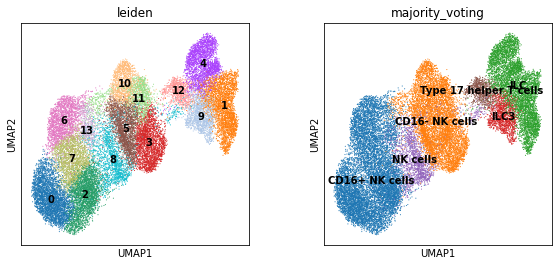

In [8]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color = ['leiden', 'majority_voting'], legend_loc = 'on data')

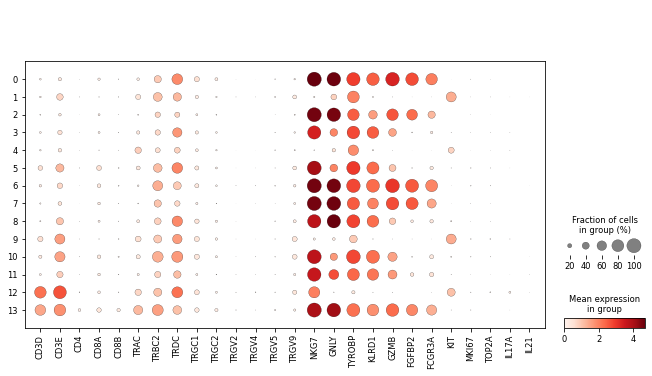

In [9]:
sc.pl.dotplot(adata, ["CD3D","CD3E","CD4","CD8A","CD8B",
                      "TRAC","TRBC2","TRDC","TRGC1","TRGC2","TRGV2","TRGV4","TRGV5","TRGV9",
                      "NKG7","GNLY","TYROBP","KLRD1", ## NK
                      "GZMB","FGFBP2","FCGR3A", ## NKT
                      "KIT",## ILC
                      "MKI67","TOP2A", "IL17A","IL21",
                     ], groupby='leiden')

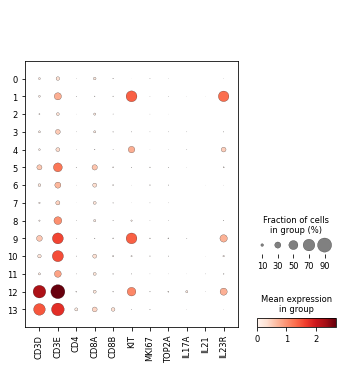

In [10]:
sc.pl.dotplot(adata, ["CD3D","CD3E","CD4","CD8A","CD8B",
                      "KIT",## ILC
                      "MKI67","TOP2A", "IL17A","IL21","IL23R"
                     ], groupby='leiden')

In [11]:
# done

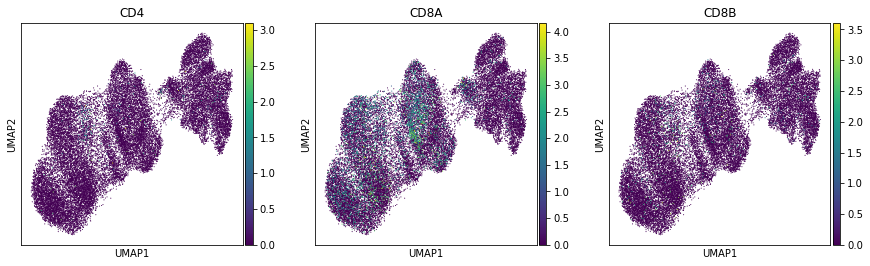

In [12]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color = ['CD4',"CD8A","CD8B"])

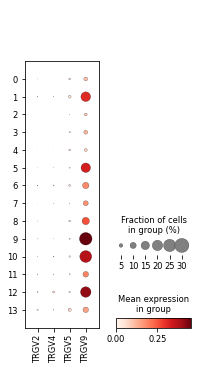

In [13]:
sc.pl.dotplot(adata, ["TRGV2","TRGV4","TRGV5","TRGV9"], groupby='leiden')

In [26]:
tmp = adata[adata.obs.index.str.contains("LP"),:]

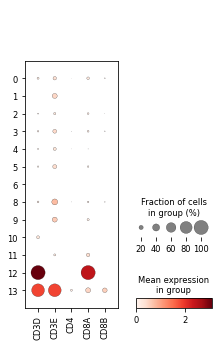

In [30]:
sc.pl.dotplot(tmp, ["CD3D","CD3E","CD4","CD8A","CD8B",
                     ], groupby='leiden')